# Space Missions

Importing the Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

Reading the Dataset:

In [4]:
df = pd.read_csv(r"D:\DS\Task\space\SpaceMissions.csv")

In [5]:
df.shape

(150, 18)

In [6]:
df.head()

,Company,Launch Date,Launch Time,Launch Site,Temperature (° F),Wind speed (MPH),Humidity (%),Vehicle Type,Liftoff Thrust (kN),Payload to Orbit (kg),Rocket Height (m),Fairing Diameter (m),Payload Name,Payload Type,Payload Mass (kg),Payload Orbit,Mission Status,Failure Reason
0,SpaceX,24-Mar-06,22:30,Marshall Islands,86.0,9.0,74.0,Falcon 1,343,470,22.25,1.5,FalconSAT-2,Research Satellite,19.5,Low Earth Orbit,Failure,Engine Fire During Launch
1,SpaceX,21-Mar-07,01:10,Marshall Islands,NaN,NaN,NaN,Falcon 1,343,470,22.25,1.5,DemoSat,Mass simulator,NaN,Low Earth Orbit,Failure,Engine Shutdown During Launch
2,SpaceX,03-Aug-08,03:34,Marshall Islands,NaN,NaN,NaN,Falcon 1,343,470,22.25,1.5,Trailblazer,Communication Satellite,NaN,Low Earth Orbit,Failure,Collision During Launch
3,SpaceX,03-Aug-08,03:34,Marshall Islands,NaN,NaN,NaN,Falcon 1,343,470,22.25,1.5,"PRESat, NanoSail-D",Research Satellites,8,Low Earth Orbit,Failure,Collision During Launch
4,SpaceX,03-Aug-08,03:34,Marshall Islands,NaN,NaN,NaN,Falcon 1,343,470,22.25,1.5,Explorers,Human Remains,NaN,Low Earth Orbit,Failure,Collision During Launch


In [7]:
df.tail()

,Company,Launch Date,Launch Time,Launch Site,Temperature (° F),Wind speed (MPH),Humidity (%),Vehicle Type,Liftoff Thrust (kN),Payload to Orbit (kg),Rocket Height (m),Fairing Diameter (m),Payload Name,Payload Type,Payload Mass (kg),Payload Orbit,Mission Status,Failure Reason
145,Boeing,11-Feb-02,17:43,Vandenberg,51.0,0.0,66.0,Delta II 7920-10C,3511,4800,38.9,3.0,Iridium IS-1,Communication Satellite,689,Low Earth Orbit,Success,NaN
146,Boeing,04-May-02,09:54,Vandenberg,59.0,8.0,67.0,Delta II 7920-10C,3511,4800,38.9,3.0,Aqua,Research Satellite,3117,Low Earth Orbit,Success,NaN
147,Boeing,03-Jul-02,06:47,Cape Canaveral,76.0,3.0,87.0,Delta II 7425,3020,1110,38.1,2.9,CONTOUR,Space Probe,328,Heliocentric Orbit,Success,NaN
148,Boeing,20-Nov-02,22:39,Cape Canaveral,72.0,5.0,73.0,"Delta IV Medium+ (4,2)",4895,6390,62.5,4.0,Eutelsat W5,Communication Satellite,3170,Geostationary Transfer Orbit,Success,NaN
149,Boeing,13-Jan-03,00:45,Vandenberg,50.0,0.0,100.0,Delta II 7320-10C,2533,2703,38.9,3.0,ICESat,Research Satellite,970,Sun-Synchronous Orbit,Success,NaN


Data Analysis

In [8]:
print(pd.isnull(df).sum())

Company                    0
Launch Date                0
Launch Time                4
Launch Site                0
Temperature (° F)         14
Wind speed (MPH)          14
Humidity (%)              14
Vehicle Type               0
Liftoff Thrust (kN)        0
Payload to Orbit (kg)      0
Rocket Height (m)          0
Fairing Diameter (m)       4
Payload Name               0
Payload Type               2
Payload Mass (kg)         17
Payload Orbit              0
Mission Status             0
Failure Reason           121
dtype: int64


In [9]:
df[df['Launch Time'].notnull()].shape

(146, 18)

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature (° F),136.0,70.441176,12.700986,37.0,60.75,73.0,80.0,93.0
Wind speed (MPH),136.0,8.007353,4.968786,0.0,5.00,8.0,12.0,23.0
Humidity (%),136.0,76.066176,15.708079,37.0,65.00,78.0,89.0,100.0
Liftoff Thrust (kN),150.0,5668.360000,3619.496024,343.0,3511.00,5885.0,6804.0,22819.0
Payload to Orbit (kg),150.0,10708.913333,9502.621246,380.0,3099.00,8300.0,22800.0,63800.0
Rocket Height (m),150.0,56.337133,16.577740,19.0,38.90,68.4,70.0,72.0
Fairing Diameter (m),146.0,4.252329,1.308869,1.0,3.00,5.2,5.2,5.4


In [11]:
# We need to encode our categories into numerical data so that our model is able to use it

df['Mission Status N'] = LabelEncoder().fit_transform(df['Mission Status'])
df.head()

,Company,Launch Date,Launch Time,Launch Site,Temperature (° F),Wind speed (MPH),Humidity (%),Vehicle Type,Liftoff Thrust (kN),Payload to Orbit (kg),Rocket Height (m),Fairing Diameter (m),Payload Name,Payload Type,Payload Mass (kg),Payload Orbit,Mission Status,Failure Reason,Mission Status N
0,SpaceX,24-Mar-06,22:30,Marshall Islands,86.0,9.0,74.0,Falcon 1,343,470,22.25,1.5,FalconSAT-2,Research Satellite,19.5,Low Earth Orbit,Failure,Engine Fire During Launch,0
1,SpaceX,21-Mar-07,01:10,Marshall Islands,NaN,NaN,NaN,Falcon 1,343,470,22.25,1.5,DemoSat,Mass simulator,NaN,Low Earth Orbit,Failure,Engine Shutdown During Launch,0
2,SpaceX,03-Aug-08,03:34,Marshall Islands,NaN,NaN,NaN,Falcon 1,343,470,22.25,1.5,Trailblazer,Communication Satellite,NaN,Low Earth Orbit,Failure,Collision During Launch,0
3,SpaceX,03-Aug-08,03:34,Marshall Islands,NaN,NaN,NaN,Falcon 1,343,470,22.25,1.5,"PRESat, NanoSail-D",Research Satellites,8,Low Earth Orbit,Failure,Collision During Launch,0
4,SpaceX,03-Aug-08,03:34,Marshall Islands,NaN,NaN,NaN,Falcon 1,343,470,22.25,1.5,Explorers,Human Remains,NaN,Low Earth Orbit,Failure,Collision During Launch,0


In [12]:
df['year'] = pd.DatetimeIndex(df['Launch Date']).year

In [13]:
df.head()

,Company,Launch Date,Launch Time,Launch Site,Temperature (° F),Wind speed (MPH),Humidity (%),Vehicle Type,Liftoff Thrust (kN),Payload to Orbit (kg),Rocket Height (m),Fairing Diameter (m),Payload Name,Payload Type,Payload Mass (kg),Payload Orbit,Mission Status,Failure Reason,Mission Status N,year
0,SpaceX,24-Mar-06,22:30,Marshall Islands,86.0,9.0,74.0,Falcon 1,343,470,22.25,1.5,FalconSAT-2,Research Satellite,19.5,Low Earth Orbit,Failure,Engine Fire During Launch,0,2006
1,SpaceX,21-Mar-07,01:10,Marshall Islands,NaN,NaN,NaN,Falcon 1,343,470,22.25,1.5,DemoSat,Mass simulator,NaN,Low Earth Orbit,Failure,Engine Shutdown During Launch,0,2007
2,SpaceX,03-Aug-08,03:34,Marshall Islands,NaN,NaN,NaN,Falcon 1,343,470,22.25,1.5,Trailblazer,Communication Satellite,NaN,Low Earth Orbit,Failure,Collision During Launch,0,2008
3,SpaceX,03-Aug-08,03:34,Marshall Islands,NaN,NaN,NaN,Falcon 1,343,470,22.25,1.5,"PRESat, NanoSail-D",Research Satellites,8,Low Earth Orbit,Failure,Collision During Launch,0,2008
4,SpaceX,03-Aug-08,03:34,Marshall Islands,NaN,NaN,NaN,Falcon 1,343,470,22.25,1.5,Explorers,Human Remains,NaN,Low Earth Orbit,Failure,Collision During Launch,0,2008


In [14]:
df.columns

Index(['Company', 'Launch Date', 'Launch Time', 'Launch Site',
       'Temperature (° F)', 'Wind speed (MPH)', 'Humidity (%)', 'Vehicle Type',
       'Liftoff Thrust (kN)', 'Payload to Orbit (kg)', 'Rocket Height (m)',
       'Fairing Diameter (m)', 'Payload Name', 'Payload Type',
       'Payload Mass (kg)', 'Payload Orbit', 'Mission Status',
       'Failure Reason', 'Mission Status N', 'year'],
      dtype='object')

In [15]:
# Group the dataset by Company and using sum method to get the Mission status descending order. 

Company = df[['Company','Mission Status N']].groupby('Company').count()
Company.reset_index(level=0,inplace=True)
Company.sort_values(by='Mission Status N',ascending=False,inplace=True)
Company.head(10)

,Company,Mission Status N
5,SpaceX,96
1,Boeing,37
6,US Air Force,7
0,Arianespace,4
2,Brazilian Space Agency,3
3,European Space Agency,2
4,Martin Marietta,1


In [16]:
Company.shape

(7, 2)

Text(0, 0.5, 'Mission Status')

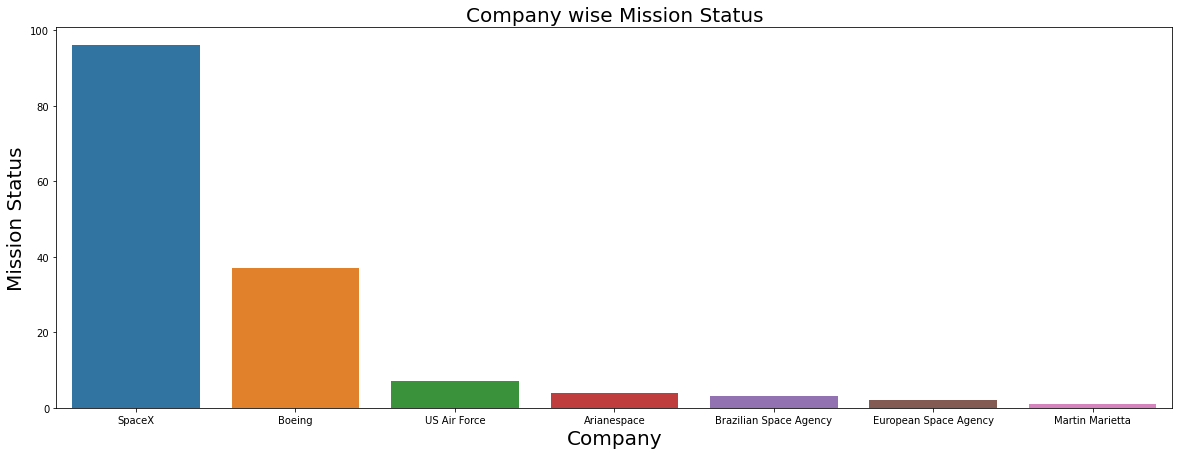

In [17]:
#Creating a Bar chart to visualize the Company wise Mission Status
plt.figure(figsize=(20,7))
sns.barplot(x=Company['Company'], y = Company['Mission Status N'])
plt.title('Company wise Mission Status',fontsize =20)
plt.xlabel('Company',fontsize=20)
plt.ylabel('Mission Status',fontsize=20)

In [18]:
# Group the dataset by Launch_Site and using sum method to get the Mission status descending order. 

Launch_Site = df[['Launch Site','Mission Status N']].groupby('Launch Site').count()
Launch_Site.reset_index(level=0,inplace=True)
Launch_Site.sort_values(by='Mission Status N',ascending=False,inplace=True)
Launch_Site.head(10)

,Launch Site,Mission Status N
2,Cape Canaveral,85
5,Vandenberg,30
3,Kennedy Space Center,19
4,Marshall Islands,7
0,Guiana Space Centre,6
1,Alcântara Launch Center,3


Text(0, 0.5, 'Number of spave Mission')

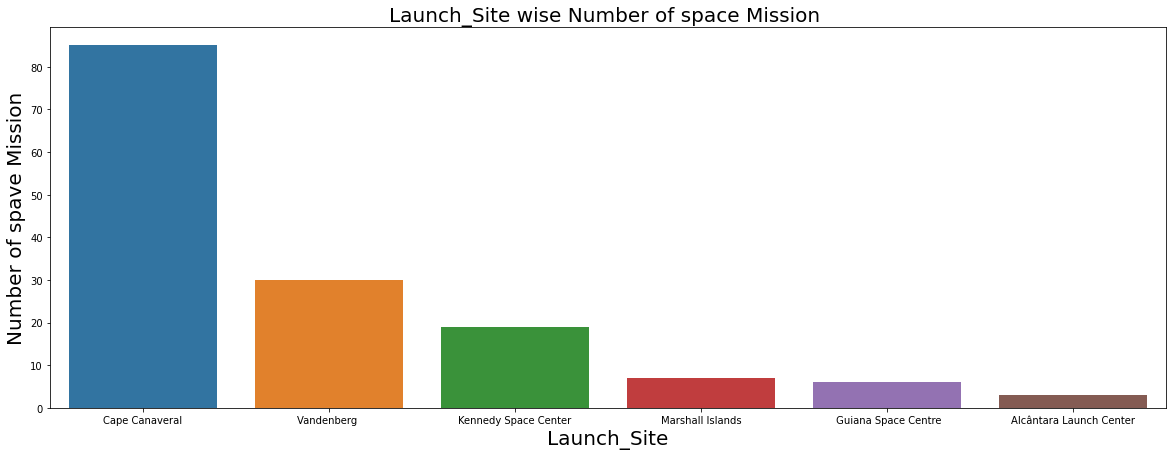

In [19]:
#Creating a Bar chart to visualize the Launch_Site  wise Number of space Mission
plt.figure(figsize=(20,7))
sns.barplot(x=Launch_Site['Launch Site'], y = Launch_Site['Mission Status N'])
plt.title('Launch_Site wise Number of space Mission ',fontsize =20)
plt.xlabel('Launch_Site',fontsize=20)
plt.ylabel('Number of spave Mission',fontsize=20)

In [20]:
# Group the dataset by Company and using sum method to get the Mission status descending order. 

year = df[['year','Mission Status N']].groupby('year').count()
year.reset_index(level=0,inplace=True)
year.sort_values(by='Mission Status N',ascending=False,inplace=True)
year.head(10)

,year,Mission Status N
27,2018,21
26,2017,18
28,2019,14
10,1999,12
25,2016,10
24,2015,8
11,2000,7
12,2001,7
23,2014,6
13,2002,5


In [21]:
year.shape

(33, 2)

Text(0, 0.5, 'Number of space mission')

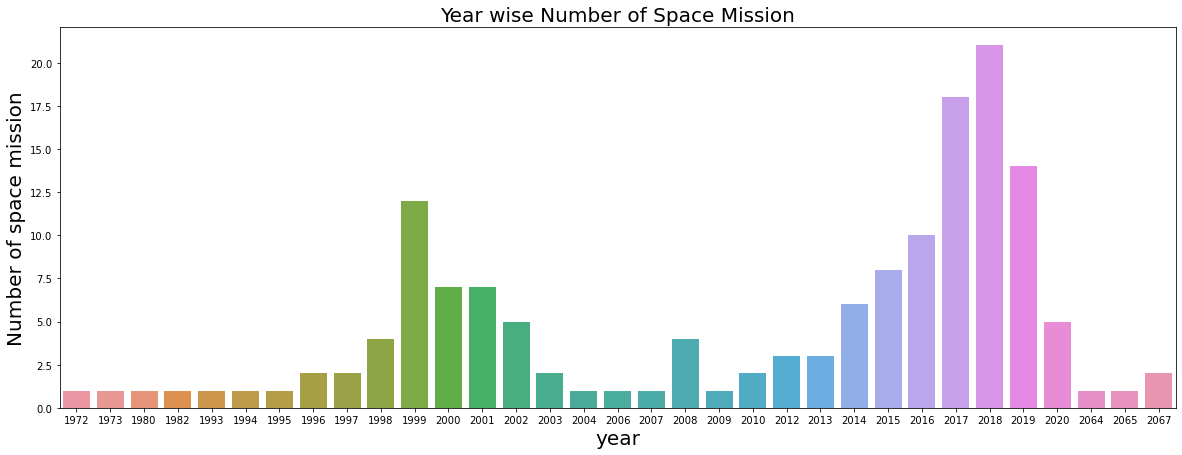

In [22]:
plt.figure(figsize=(20,7))
sns.barplot(x=year['year'], y = year['Mission Status N'])
plt.title('Year wise Number of Space Mission',fontsize =20)
plt.xlabel('year',fontsize=20)
plt.ylabel('Number of space mission',fontsize=20)

In [23]:
# Group the dataset by Vehicle Type and using sum method to get the Mission status descending order. 

Vehicle_Type = df[['Vehicle Type','Mission Status N']].groupby('Vehicle Type').count()
Vehicle_Type.reset_index(level=0,inplace=True)
Vehicle_Type.sort_values(by='Mission Status N',ascending=False,inplace=True)
Vehicle_Type.head(10)

,Vehicle Type,Mission Status N
21,Falcon 9 Block 5,26
22,Falcon 9 Full Thrust (v1.2),18
18,Falcon 9 (v1.1),16
20,Falcon 9 Block 4,12
12,Delta II 7925,10
19,Falcon 9 Block 3,8
16,Falcon 1,7
17,Falcon 9 (v1.0),6
11,Delta II 7920-10C,5
6,Delta II 7420-10C,4


In [24]:
Vehicle_Type.shape

(31, 2)

Text(0, 0.5, 'Number of space mission')

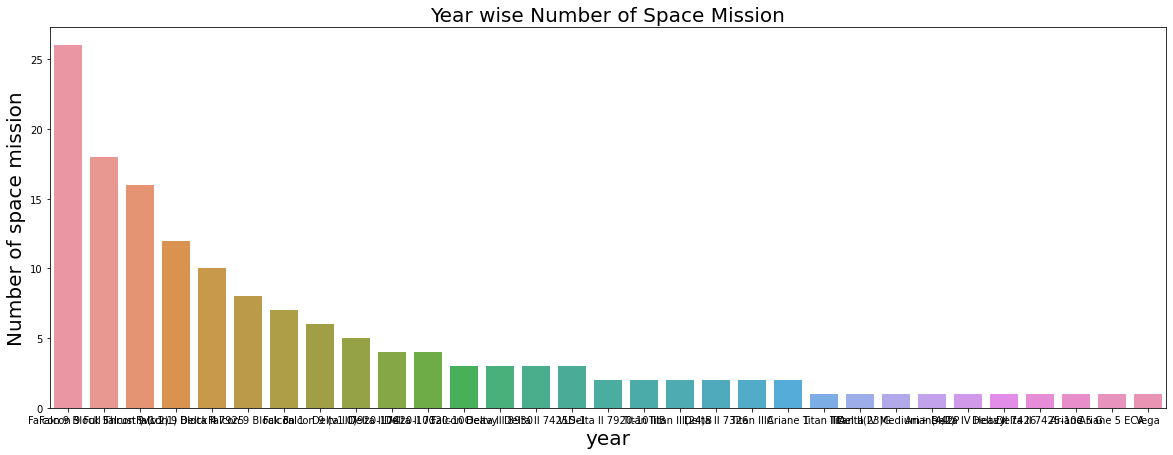

In [25]:
plt.figure(figsize=(20,7))
sns.barplot(x=Vehicle_Type['Vehicle Type'], y = Vehicle_Type['Mission Status N'])
plt.title('Year wise Number of Space Mission',fontsize =20)
plt.xlabel('year',fontsize=20)
plt.ylabel('Number of space mission',fontsize=20)

In [26]:
# Group the dataset by Temp and using sum method to get the Mission Status descending order. 

Temp = df[['Temperature (° F)','Mission Status N']].groupby('Temperature (° F)').sum()
Temp.reset_index(level=0,inplace=True)
Temp.sort_values(by='Mission Status N',ascending=False,inplace=True)
Temp.head(10)

,Temperature (° F),Mission Status N
30,77.0,10
28,75.0,7
21,68.0,7
25,72.0,6
34,81.0,5
32,79.0,4
27,74.0,4
4,50.0,4
5,51.0,4
40,88.0,4


In [27]:
Temp.shape

(45, 2)

In [28]:
df2 = pd.DataFrame(Temp)
  
X = list(df2.iloc[:, 0])
Y = list(df2.iloc[:, 1])

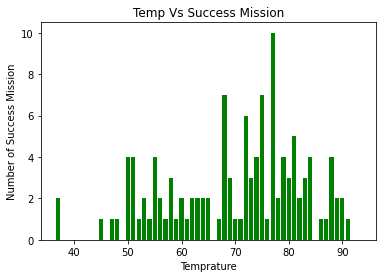

In [29]:
# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.title("Temp Vs Success Mission")
plt.xlabel("Temprature")
plt.ylabel("Number of Success Mission")
  
# Show the plot
plt.show()

In [30]:
# Group the dataset by Wind speed and using sum method to get the Mission Status descending order. 

Wind_speed = df[['Wind speed (MPH)','Mission Status N']].groupby('Wind speed (MPH)').sum()
Wind_speed.reset_index(level=0,inplace=True)
Wind_speed.sort_values(by='Mission Status N',ascending=False,inplace=True)
Wind_speed.head(10)

,Wind speed (MPH),Mission Status N
6,9.0,17
0,0.0,16
5,8.0,16
8,12.0,14
1,3.0,12
2,5.0,9
3,6.0,8
9,13.0,7
4,7.0,6
7,10.0,2


In [31]:
Wind_speed.shape

(18, 2)

In [32]:
df3 = pd.DataFrame(Wind_speed)
  
X = list(df3.iloc[:, 0])
Y = list(df3.iloc[:, 1])

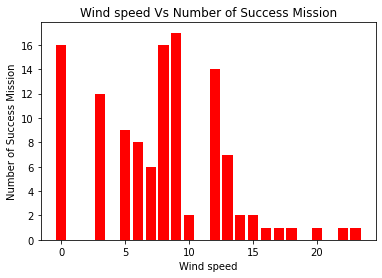

In [33]:
# Plot the data using bar() method
plt.bar(X, Y, color='r')
plt.title("Wind speed Vs Number of Success Mission")
plt.xlabel("Wind speed")
plt.ylabel("Number of Success Mission")
  
# Show the plot
plt.show()

In [34]:
# Group the dataset by Humidity and using sum method to get the Mission Status descending order. 

Humidity  = df[['Humidity (%)','Mission Status N']].groupby('Humidity (%)').sum()
Humidity.reset_index(level=0,inplace=True)
Humidity.sort_values(by='Mission Status N',ascending=False,inplace=True)
Humidity.head(10)

,Humidity (%),Mission Status N
46,94.0,8
49,100.0,7
29,74.0,7
26,70.0,6
43,90.0,6
33,79.0,5
21,65.0,4
41,88.0,4
20,64.0,4
47,96.0,3


In [35]:
Humidity.shape

(50, 2)

In [36]:
df4 = pd.DataFrame(Humidity)
  
X = list(df4.iloc[:, 0])
Y = list(df4.iloc[:, 1])

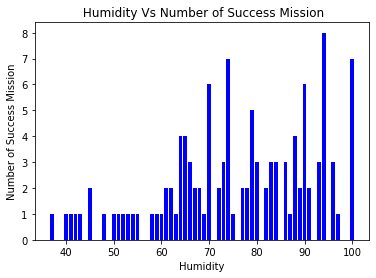

In [37]:
# Plot the data using bar() method
plt.bar(X, Y, color='b')
plt.title(" Humidity Vs Number of Success Mission")
plt.xlabel("Humidity")
plt.ylabel("Number of Success Mission")
  
# Show the plot
plt.show()

In [38]:
# Group the dataset by Rocket Height (m) and using sum method to get the Mission Status descending order. 

Rocket_Height = df[['Rocket Height (m)','Mission Status N']].groupby('Rocket Height (m)').sum()
Rocket_Height .reset_index(level=0,inplace=True)
Rocket_Height .sort_values(by='Rocket Height (m)',ascending=False,inplace=True)
Rocket_Height .head(10)


,Rocket Height (m),Mission Status N
17,72.00,0
16,70.00,66
15,68.40,15
14,62.50,1
13,58.72,0
12,54.90,5
11,53.00,0
10,52.00,0
9,50.00,0
8,45.00,0


In [39]:
Rocket_Height .shape

(18, 2)

In [40]:
df5 = pd.DataFrame(Rocket_Height )
  
X = list(df5.iloc[:, 0])
Y = list(df5.iloc[:, 1])

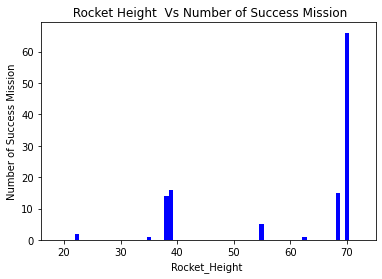

In [41]:
# Plot the data using bar() method
plt.bar(X, Y, color='b')
plt.title(" Rocket Height  Vs Number of Success Mission")
plt.xlabel("Rocket_Height ")
plt.ylabel("Number of Success Mission")
  
# Show the plot
plt.show()

In [42]:
df.columns

Index(['Company', 'Launch Date', 'Launch Time', 'Launch Site',
       'Temperature (° F)', 'Wind speed (MPH)', 'Humidity (%)', 'Vehicle Type',
       'Liftoff Thrust (kN)', 'Payload to Orbit (kg)', 'Rocket Height (m)',
       'Fairing Diameter (m)', 'Payload Name', 'Payload Type',
       'Payload Mass (kg)', 'Payload Orbit', 'Mission Status',
       'Failure Reason', 'Mission Status N', 'year'],
      dtype='object')